# LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding = 'ANSI')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])

In [4]:
df_time_series = df.groupby("order date (DateOrders)")["Sales"].sum().reset_index()
df_time_series = df_time_series.sort_values("order date (DateOrders)")

df_time_series.head()

,order date (DateOrders),Sales
0,2015-01-01 00:00:00,299.980011
1,2015-01-01 00:21:00,579.980011
2,2015-01-01 01:03:00,699.850010
3,2015-01-01 01:24:00,1129.860039
4,2015-01-01 02:06:00,579.920013


In [5]:
df_time_series.columns = ["Date", "Sales"]
df_time_series.columns

Index(['Date', 'Sales'], dtype='object')

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_time_series["Sales"] = scaler.fit_transform(df_time_series["Sales"].values.reshape(-1, 1))


In [7]:
data = df_time_series["Sales"].values


# Experiment 1

In [8]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i: i + seq_length])
    return np.array(sequences)
seq_length = 10
X_train = create_sequences(train, seq_length)
X_test = create_sequences(test, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, train[seq_length:], epochs=10, batch_size=16, validation_data=(X_test, test[seq_length:]))


c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 69s 20ms/step - loss: 0.0102 - val_loss: 0.0169
Epoch 2/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 59s 18ms/step - loss: 0.0098 - val_loss: 0.0163
Epoch 3/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 73s 15ms/step - loss: 0.0098 - val_loss: 0.0143
Epoch 4/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 0.0098 - val_loss: 0.0150
Epoch 5/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0097 - val_loss: 0.0148
Epoch 6/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0098 - val_loss: 0.0148
Epoch 7/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0098 - val_loss: 0.0145
Epoch 8/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0097 - val_loss: 0.0150
Epoch 9/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.0098 - val_loss: 0.0143
Epoch 10/10
3287/3287 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0097 - val_loss: 0.0149


# Experiment 2

In [9]:
model = Sequential([
    LSTM(30, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(30, return_sequences=False),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, train[seq_length:], epochs=5, batch_size=32, validation_data=(X_test, test[seq_length:]))

Epoch 1/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0104 - val_loss: 0.0162
Epoch 2/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0098 - val_loss: 0.0148
Epoch 3/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0098 - val_loss: 0.0153
Epoch 4/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0098 - val_loss: 0.0145
Epoch 5/5
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0098 - val_loss: 0.0149


# Experiment 3 

In [10]:
model = Sequential([
    LSTM(40, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(40, return_sequences=False),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, train[seq_length:], epochs=15, batch_size=32, validation_data=(X_test, test[seq_length:]))

Epoch 1/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 0.0104 - val_loss: 0.0158
Epoch 2/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0097 - val_loss: 0.0155
Epoch 3/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0098 - val_loss: 0.0140
Epoch 4/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0098 - val_loss: 0.0140
Epoch 5/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0098 - val_loss: 0.0155
Epoch 6/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0099 - val_loss: 0.0151
Epoch 7/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0098 - val_loss: 0.0140
Epoch 8/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0098 - val_loss: 0.0150
Epoch 9/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0098 - val_loss: 0.0150
Epoch 10/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0098 - val_loss: 0.0152
Epoch 11/15
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0099 - val_loss: 0.0152
Epoch 12/15
1644/16

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


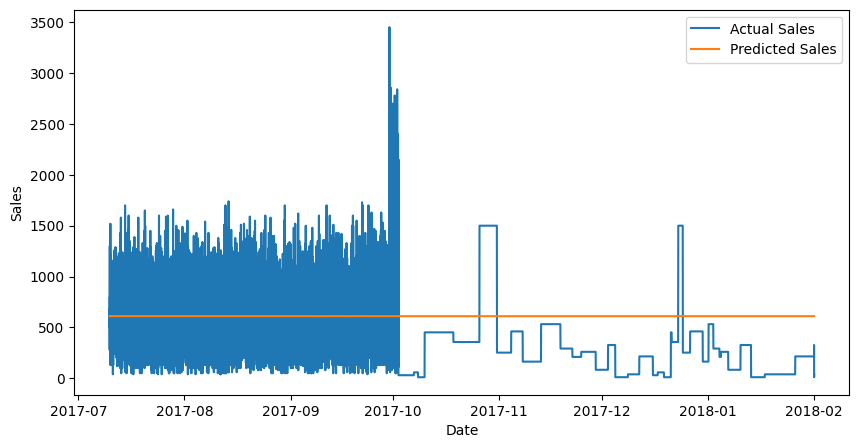

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df_time_series["Date"].iloc[train_size + seq_length:], scaler.inverse_transform(test[seq_length:].reshape(-1, 1)), label='Actual Sales')
plt.plot(df_time_series["Date"].iloc[train_size + seq_length:], predictions, label='Predicted Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


- The model does not capture real sales patterns.
- Predicted values are almost flat, showing no real learning.
- LSTMs struggle with demand spikes and irregular timestamps.
- Even with tuning, validation loss fluctuated and never improved.

# Experiment 4

In [16]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    LSTM(40, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    
    LSTM(40, return_sequences=True),  # Second LSTM layer
    Dropout(0.3),

    LSTM(40, return_sequences=False),  # Third LSTM layer
    Dropout(0.3),

    Dense(25, activation='relu'),  
    Dense(10, activation='relu'),  

    Dense(1)  # No activation (linear for regression)
])

# Corrected optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training with correct batch size
model.fit(X_train, train[seq_length:], epochs=30, batch_size=64, validation_data=(X_test, test[seq_length:]))


Epoch 1/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0111 - val_loss: 0.0149
Epoch 2/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0099 - val_loss: 0.0141
Epoch 3/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0099 - val_loss: 0.0152
Epoch 4/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0098 - val_loss: 0.0150
Epoch 5/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0097 - val_loss: 0.0147
Epoch 6/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0097 - val_loss: 0.0142
Epoch 7/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0098 - val_loss: 0.0157
Epoch 8/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0098 - val_loss: 0.0152
Epoch 9/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0098 - val_loss: 0.0145
Epoch 10/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0098 - val_loss: 0.0156
Epoch 11/30
822/822 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0098 - val_loss: 0.0144
Epoch 12/30
822/822 ━━━━━━━━━━━

# Experiment 5

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model Architecture
model = Sequential([
    LSTM(40, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.5),

    LSTM(40, return_sequences=True),
    Dropout(0.5),

    LSTM(40, return_sequences=False),
    Dropout(0.5),

    Dense(25, activation='relu', kernel_regularizer=l2(0.001)),  
    Dense(10, activation='relu', kernel_regularizer=l2(0.001)),  

    Dense(1)  
])

# Optimizer with Lower Learning Rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train Model
model.fit(X_train, train[seq_length:], epochs=10, batch_size=32, validation_data=(X_test, test[seq_length:]), callbacks=[lr_scheduler])


Epoch 1/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.0283 - val_loss: 0.0151 - learning_rate: 5.0000e-04
Epoch 2/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0098 - val_loss: 0.0152 - learning_rate: 5.0000e-04
Epoch 3/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0098 - val_loss: 0.0149 - learning_rate: 5.0000e-04
Epoch 4/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0098 - val_loss: 0.0149 - learning_rate: 5.0000e-04
Epoch 5/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0098 - val_loss: 0.0150 - learning_rate: 5.0000e-04
Epoch 6/10
1642/1644 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0098
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0098 - val_loss: 0.0150 - learning_rate: 5.0000e-04
Epoch 7/10
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0097 - val_loss: 0.0149 - learning_rate: 2.5000e-04
Epoch 8/10
1644/1644 ━━━━━━━━━━━━━━━━━━

In [18]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.4),  

    LSTM(64, return_sequences=True),
    Dropout(0.4),

    LSTM(64, return_sequences=False),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dense(10, activation='relu'),

    Dense(1)  # No activation for regression
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0003), loss='mean_squared_error')

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train Model
model.fit(X_train, train[seq_length:], epochs=20, batch_size=32, validation_data=(X_test, test[seq_length:]), callbacks=[lr_scheduler])


Epoch 1/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 0.0114 - val_loss: 0.0143 - learning_rate: 3.0000e-04
Epoch 2/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 0.0098 - val_loss: 0.0139 - learning_rate: 3.0000e-04
Epoch 3/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 0.0097 - val_loss: 0.0140 - learning_rate: 3.0000e-04
Epoch 4/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 0.0097 - val_loss: 0.0153 - learning_rate: 3.0000e-04
Epoch 5/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0098
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 0.0098 - val_loss: 0.0148 - learning_rate: 3.0000e-04
Epoch 6/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 0.0097 - val_loss: 0.0151 - learning_rate: 1.5000e-04
Epoch 7/20
1644/1644 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0098 - val_loss: 0.0148 - learning_rate: 1.5000e-04
Epoch 8/20
1643/1644 ━━━━━━━━━━━━━━━━━━